In [ ]:
# libraries
import matplotlib.pyplot as plt
from nilearn.connectome import ConnectivityMeasure
from nilearn.maskers import NiftiLabelsMasker
from nilearn import datasets
from nilearn import plotting
import nibabel as nib
import numpy as  np
import os

In [ ]:
# fetching Schaefer 2018 400 ROI 17 yeo networks 2 mm resolution cubes atlas
dataset = datasets.fetch_atlas_schaefer_2018(n_rois=400, yeo_networks=17, resolution_mm=2, data_dir=None, base_url=None, resume=True, verbose=1)
atlas_filename = dataset.maps

# labeling coordinates as found on atlas Github
coords = ['VisCent', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'VisPeri', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SomMot', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'DorsAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SalVentAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Limbic', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Cont', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Default', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',  ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'TempPar', ' ', ' ', ' ', ' ', ' ', 'VisCent', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'VisPeri', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SomMot', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'DorsAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SalVentAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Limbic', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Cont', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Default', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'TempPar', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
labels = np.asarray(coords)

# creating mask for data with Pearson correlation functional connectivity
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True)
correlation_measure = ConnectivityMeasure(kind='correlation')

# applying mask to 4 scans from a subject
os.chdir('/data/hcp_working_folder/tdhore2/subj/106319/func')
img = nib.load('rfMRI_REST1_LR.nii.gz')
LR1_1 = masker.fit_transform(img)
LR1_1matrix = correlation_measure.fit_transform([LR1_1])[0]
img2 = nib.load('rfMRI_REST2_LR.nii.gz')
LR2_1 = masker.fit_transform(img2)
LR2_1matrix = correlation_measure.fit_transform([LR2_1])[0]
img3 = nib.load('rfMRI_REST1_RL.nii.gz')
RL1_1 = masker.fit_transform(img3)
RL1_1matrix = correlation_measure.fit_transform([RL1_1])[0]
img4 = nib.load('rfMRI_REST2_RL.nii.gz')
RL2_1 = masker.fit_transform(img4)
RL2_1matrix = correlation_measure.fit_transform([RL2_1])[0]

# saving the matrices
np.savez('mx_106310', LR1 = LR1_1matrix, RL1 = RL1_1matrix, LR2 = LR2_1matrix, RL2 = RL2_1matrix)

In [ ]:
coords = ['VisCent', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'VisPeri', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SomMot', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'DorsAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SalVentAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Limbic', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Cont', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Default', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',  ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'TempPar', ' ', ' ', ' ', ' ', ' ', 'VisCent', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'VisPeri', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SomMot', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'DorsAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'SalVentAttn', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Limbic', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Cont', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'Default', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'TempPar', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
labels = np.asarray(coords)

# loading the saved matrices
os.chdir('/data/hcp_working_folder/tdhore2/subj/108525/func')
x = np.load('mx_108525.npz')
LR1 = x['LR1']
LR2 = x['LR2']
RL1 = x['RL1']
RL2 = x['RL2']

# taking the average of all four matrices
sum_all = np.array([LR1, LR2, RL1, RL2])
# avg_all = np.mean(sum_all, axis = 0)
avg_all = LR1
avg_all.shape

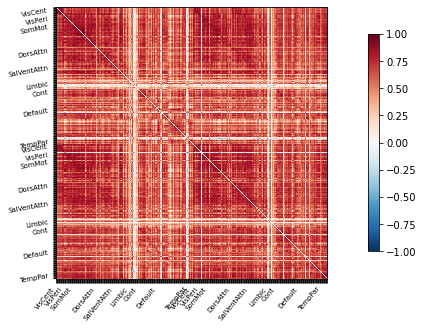

In [9]:
# plotting averaged functional connetivity matrix
np.fill_diagonal(avg_all, 0)
plotting.plot_matrix(avg_all, labels=labels, colorbar=True, vmax=1.0, vmin=-1.0)